# Fauna data LSTM

Import

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
EVENTS_CACHE_PATH = os.path.expanduser("~/EventCache")
filename_data = os.path.join(EVENTS_CACHE_PATH, 'RawLabelledData/dca6327d8fa8_20210330_raw_20210330T152242Z_ds_5_data.npy')
filename_labels = os.path.join(EVENTS_CACHE_PATH, 'RawLabelledData/dca6327d8fa8_20210330_raw_20210330T152242Z_ds_5_labels.npy')

data = np.load(filename_data)
labels = np.load(filename_labels)

In [3]:
# create artificial training data
channel = 4
event1 = data[582400:583200,channel]
event2 = data[909000:910500,channel]
event3 = data[1801000:1802000,channel]
event_fake = np.concatenate((np.linspace(1444, 3000, num=300).astype(int), np.linspace(3000, 1444, num=300).astype(int)))
noise = data[979000:990000,channel]
data_chunk = np.concatenate((noise, event1, noise, event2, noise, event_fake, noise, event3, noise, event2, noise, event_fake, noise))
labels_chunk = np.zeros(data_chunk.size)
labels_chunk[11300:11600] = 1
labels_chunk[23500:23800] = 1
labels_chunk[47200:47600] = 1
labels_chunk[59500:60100] = 1

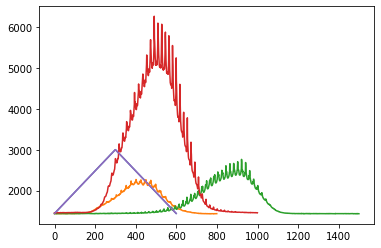

In [10]:
plt.plot(event_fake)
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
plt.plot(event1)
plt.plot(event2)
plt.plot(event3)
plt.plot(event_fake)
#plt.plot(noise)

In [ ]:
data_chunk = np.reshape(data_chunk, (-1, 1))
labels_chunk = np.reshape(labels_chunk, (-1, 1))

In [ ]:
combined = np.concatenate((data_chunk, labels_chunk), axis=1).astype(int)

In [ ]:
np.savetxt("insect_data.csv", combined, delimiter=",", fmt='%d', header="Sensor,Insect")

In [ ]:
# plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_ylabel('data', color=color)
ax1.plot(data_chunk, color=color)
ax1.tick_params(axis='y', color=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('labelled', color=color)
ax2.plot(labels_chunk, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()